In [34]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [69]:
def initialisation(dimensions):
    parameters = {}

    C = len(dimensions)

    for c in range(1, C):
        parameters['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c - 1])
        parameters['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parameters


def forward_propagation(X, parameters):
    activations = {'A0': X}
    C = len(parameters) // 2

    for c in range(1, C + 1):
        Z = parameters['W' + str(c)].dot(activations['A' + str(c - 1)]) + parameters['b' + str(c)]
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

    return activations


def log_loss(A, y):
    return -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))


def back_propagation(y, activations, parameters):
    m = y.shape[1]
    C = len(parameters) // 2

    dZ = activations['A' + str(C)] - y
    gradients = {}

    for c in reversed(range(1, C + 1)):
        gradients['dW' + str(c)] = 1 / m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        if c > 1:
            dZ = np.dot(parameters['W' + str(c)].T, dZ) * activations['A' + str(c - 1)] * (
                        1 - activations['A' + str(c - 1)])

    return gradients


def update(gradients, parameters, learning_rate):
    
    C = len(parameters) // 2

    for c in range(1, C + 1):
        parameters['W' + str(c)] = parameters['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parameters['b' + str(c)] = parameters['b' + str(c)] - learning_rate * gradients['db' + str(c)]
    
    return parameters


def predict(X, parameters):
    C = len(parameters) // 2
    activations = forward_propagation(X, parameters)
    return activations['A' + str(C)] >= 0.5


def neural_network(X_train, y_train, hidden_layers = (32, 32, 32), learning_rate=0.1, n_iter=1000):
    
    # initialisation des parametres
    dimensions = list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])
    parameters = initialisation(dimensions)

    train_loss = []
    train_accuracy = []

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parameters)
        gradients = back_propagation(y_train, activations, parameters)
        parameters = update(gradients, parameters, learning_rate)

        if i % 10 == 0:
            C = len(parameters) // 2
            train_loss.append(log_loss(activations['A' + str(C)], y_train))
            y_pred = predict(X_train, parameters)
            print(y_pred.shape)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_accuracy.append(current_accuracy)

    return parameters, train_loss, train_accuracy


Dimensions de X :  (2, 100)
Dimensions de y :  (1, 100)


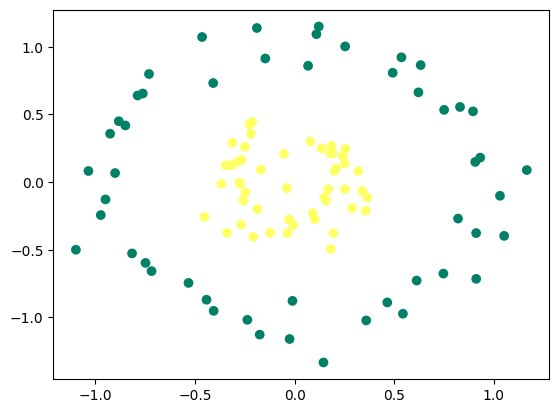

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('Dimensions de X : ', X.shape)
print('Dimensions de y : ', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [4]:
parameters, loss, accuracy = neural_network(X, y, hidden_layers=(32,32,32), n_iter=1000, learning_rate=0.1)

100%|██████████| 1000/1000 [00:00<00:00, 6882.84it/s]


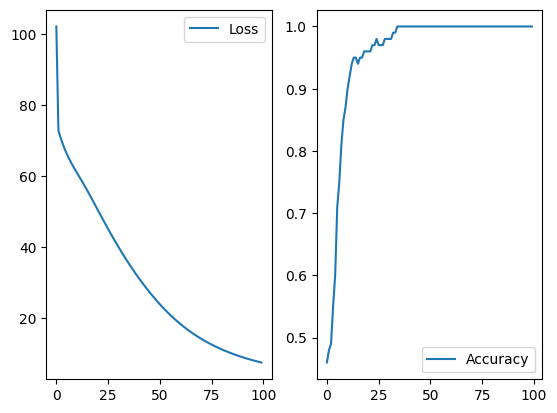

1.0


In [5]:
plt.figure()

plt.subplot(1, 2, 1)
plt.plot(loss, label='Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Accuracy')
plt.legend()

plt.show()

print(accuracy[-1])

In [60]:
data = pd.read_csv('data/Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [61]:
# Suppression colonnes inutiles
data = data.drop('PassengerId', axis=1)
data = data.drop('Name', axis=1)
data = data.drop('Ticket', axis=1)
data = data.drop('Cabin', axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [62]:
# Typage des données 
def can_be_converted_to_bool(col):
    return col.isin([0, 1]).all()

for col in data.columns:
    if can_be_converted_to_bool(data[col]):
        data[col] = data[col].astype(bool)

data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,3,male,22.0,1,0,7.2500,S
1,True,1,female,38.0,1,0,71.2833,C
2,True,3,female,26.0,0,0,7.9250,S
3,True,1,female,35.0,1,0,53.1000,S
4,False,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,False,2,male,27.0,0,0,13.0000,S
887,True,1,female,19.0,0,0,30.0000,S
888,False,3,female,NaN,1,2,23.4500,S
889,True,1,male,26.0,0,0,30.0000,C


In [63]:
data = pd.get_dummies(data, drop_first=True)
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,False,3,22.0,1,0,7.2500,True,False,True
1,True,1,38.0,1,0,71.2833,False,False,False
2,True,3,26.0,0,0,7.9250,False,False,True
3,True,1,35.0,1,0,53.1000,False,False,True
4,False,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,False,2,27.0,0,0,13.0000,True,False,True
887,True,1,19.0,0,0,30.0000,False,False,True
888,False,3,NaN,1,2,23.4500,False,False,True
889,True,1,26.0,0,0,30.0000,True,False,False


In [64]:
numerical_col = data.select_dtypes(include='number').columns

# Scaler
scaler = StandardScaler()
data[numerical_col] = scaler.fit_transform(data[numerical_col])
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,False,0.827377,-0.530377,0.432793,-0.473674,-0.502445,True,False,True
1,True,-1.566107,0.571831,0.432793,-0.473674,0.786845,False,False,False
2,True,0.827377,-0.254825,-0.474545,-0.473674,-0.488854,False,False,True
3,True,-1.566107,0.365167,0.432793,-0.473674,0.420730,False,False,True
4,False,0.827377,0.365167,-0.474545,-0.473674,-0.486337,True,False,True
...,...,...,...,...,...,...,...,...,...
886,False,-0.369365,-0.185937,-0.474545,-0.473674,-0.386671,True,False,True
887,True,-1.566107,-0.737041,-0.474545,-0.473674,-0.044381,False,False,True
888,False,0.827377,NaN,0.432793,2.008933,-0.176263,False,False,True
889,True,-1.566107,-0.254825,-0.474545,-0.473674,-0.044381,True,False,False


In [65]:
data = data.dropna()
data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,False,0.827377,-0.530377,0.432793,-0.473674,-0.502445,True,False,True
1,True,-1.566107,0.571831,0.432793,-0.473674,0.786845,False,False,False
2,True,0.827377,-0.254825,-0.474545,-0.473674,-0.488854,False,False,True
3,True,-1.566107,0.365167,0.432793,-0.473674,0.420730,False,False,True
4,False,0.827377,0.365167,-0.474545,-0.473674,-0.486337,True,False,True
...,...,...,...,...,...,...,...,...,...
885,False,0.827377,0.640719,-0.474545,5.732844,-0.061999,False,True,False
886,False,-0.369365,-0.185937,-0.474545,-0.473674,-0.386671,True,False,True
887,True,-1.566107,-0.737041,-0.474545,-0.473674,-0.044381,False,False,True
889,True,-1.566107,-0.254825,-0.474545,-0.473674,-0.044381,True,False,False


In [66]:
X = data.drop('Survived', axis=1)
X = X.astype('float32')
y = data['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train = X_train.T
y_train = y_train.reshape(-1, 1)

print('Dimensions de X : ', X_train.shape)
print('Dimensions de y : ', y_train.shape)

Dimensions de X :  (8, 571)
Dimensions de y :  (571, 1)


In [ ]:
parameters, loss, accuracy = neural_network(X_train, y_train, hidden_layers=(32,32,32), n_iter=1000, learning_rate=0.1)